#### Загрузка данных

In [3]:
import pandas as pd
df = pd.read_csv('data.csv')
df

,Unnamed: 0,Height,Weight
0,0,167.0812,51.242630
1,1,181.6608,61.900227
2,2,176.2760,69.401361
3,3,173.2788,64.553288
4,4,172.1866,65.442177
...,...,...,...
195,195,167.1320,54.802721
196,196,167.9194,52.507937
197,197,173.3296,58.185941
198,198,172.7708,57.809524


#### Обучение модели линейной регрессии

In [17]:
from sklearn import linear_model


num_records = df.shape[0]
X = df["Height"].to_numpy().reshape(num_records, 1)
y = df["Weight"].to_numpy().reshape(num_records, 1)

model = linear_model.LinearRegression().fit(X, y)
display(f"weight = {model.intercept_[0]} + {model.coef_.T[0][0]} * height") # type: ignore

'weight = -48.08512764117068 + 0.6129012675686305 * height'

В среднем на каждый килограмм приходится 0,6 см роста.

#### Оценка ошибки работы модели

In [20]:
from sklearn import metrics


y_pred = model.predict(X)
mae = metrics.mean_absolute_error(y, y_pred)
display(f"MAE = {mae}")

'MAE = 3.5187017598132515'

В среднем предсказание отстает от фактического значения на 3,5 кг.

#### Визуализация результатов

Text(0, 0.5, 'Вес, кг')

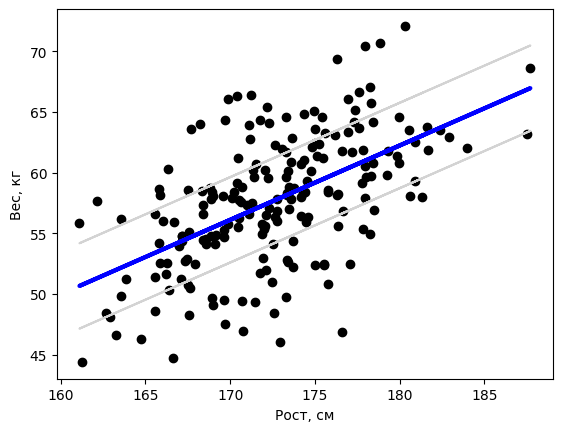

In [21]:
import matplotlib.pyplot as plt


plt.scatter(X, y, color='black')
plt.plot(X, y_pred, color='blue', linewidth=3)
plt.plot(X, y_pred + mae, color='lightgray')
plt.plot(X, y_pred - mae, color='lightgray')
plt.xlabel('Рост, см')
plt.ylabel('Вес, кг')

#### Определение линейной зависимости (линейная корреляция)

In [24]:
from scipy import stats


corr, pval = stats.pearsonr(X[:,0], y[:,0])

display(corr)
display(pval)
display(f"{pval} < 0.05")

0.5568647346122991

1.1029015151266828e-17

'1.1029015151266828e-17 < 0.05'

corr > 0, значит обнаружена линейная зависимость между x и y

corr -> 1, присутствует сильная корреляция

pval < 5%, значит корреляция присутствует
